In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df= pd.read_csv('Workbook2.csv')

In [28]:
df.head()

,time,counter,text
0,7:27PM,GOLDETF,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO...
1,7:10PM,BIMB,"EMPLOYEES PROVIDENT FUND BOARD (1,000,000 unit..."
2,7:07PM,MYETFID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO...
3,7:06PM,METFSID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO...
4,7:06PM,CIMBA40,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO...


I choose 29/12/2017 in order to present the interpretation 

In [32]:
from textblob import TextBlob
import re
import numpy as np 

In [33]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[^a-zA-Z#]"," ",tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity>0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [35]:
df['clean']=np.array([clean_tweet(text) for text in df.text])
df.head(20)

,time,counter,text,clean
0,7:27PM,GOLDETF,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,NET ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
1,7:10PM,BIMB,"EMPLOYEES PROVIDENT FUND BOARD (1,000,000 units Acquired)",EMPLOYEES PROVIDENT FUND BOARD units Acquired
2,7:07PM,MYETFID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,NET ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
3,7:06PM,METFSID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,NET ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
4,7:06PM,CIMBA40,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,NET ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
5,7:06PM,MYETFDJ,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,NET ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
6,7:05PM,METFAPA,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,NET ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
7,7:05PM,CIMBC50,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,NET ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
8,7:00PM,OSKVI,OTHERS,OTHERS
9,7:00PM,LBS,"KUMPULAN WANG PERSARAAN (DIPERBADANKAN) (268,300 units Acquired)",KUMPULAN WANG PERSARAAN DIPERBADANKAN units Acquired


In [36]:
df['clean']=df['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head(10)

,time,counter,text,clean
0,7:27PM,GOLDETF,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
1,7:10PM,BIMB,"EMPLOYEES PROVIDENT FUND BOARD (1,000,000 units Acquired)",EMPLOYEES PROVIDENT FUND BOARD units Acquired
2,7:07PM,MYETFID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
3,7:06PM,METFSID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
4,7:06PM,CIMBA40,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
5,7:06PM,MYETFDJ,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
6,7:05PM,METFAPA,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
7,7:05PM,CIMBC50,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE
8,7:00PM,OSKVI,OTHERS,OTHERS
9,7:00PM,LBS,"KUMPULAN WANG PERSARAAN (DIPERBADANKAN) (268,300 units Acquired)",KUMPULAN WANG PERSARAAN DIPERBADANKAN units Acquired


In [37]:
from wordcloud import WordCloud
df_wc = " ".join(text for text in df.clean)
print(len(df_wc))

16115


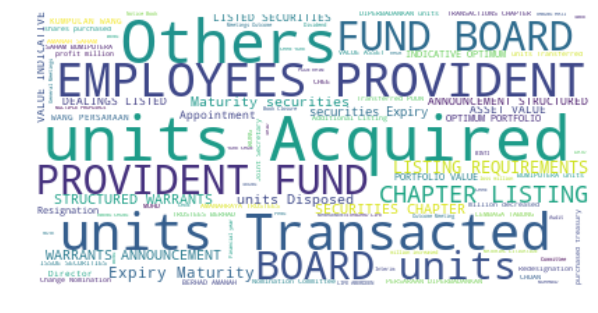

In [38]:
import matplotlib.pyplot as plt
wordcloud2 = WordCloud(background_color='white').generate(df_wc)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [40]:
df['sentiment'] = df['clean'].apply(sentiment_calc)

In [41]:
df.head()

,time,counter,text,clean,sentiment
0,7:27PM,GOLDETF,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"(0.7, 0.9)"
1,7:10PM,BIMB,"EMPLOYEES PROVIDENT FUND BOARD (1,000,000 units Acquired)",EMPLOYEES PROVIDENT FUND BOARD units Acquired,"(0.0, 0.0)"
2,7:07PM,MYETFID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"(0.7, 0.9)"
3,7:06PM,METFSID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"(0.7, 0.9)"
4,7:06PM,CIMBA40,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"(0.7, 0.9)"


In [42]:
df['polarity']= np.array([analize_sentiment(text) for text in df["clean"] ])

In [43]:
df.head()

,time,counter,text,clean,sentiment,polarity
0,7:27PM,GOLDETF,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"(0.7, 0.9)",1
1,7:10PM,BIMB,"EMPLOYEES PROVIDENT FUND BOARD (1,000,000 units Acquired)",EMPLOYEES PROVIDENT FUND BOARD units Acquired,"(0.0, 0.0)",0
2,7:07PM,MYETFID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"(0.7, 0.9)",1
3,7:06PM,METFSID,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"(0.7, 0.9)",1
4,7:06PM,CIMBA40,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"(0.7, 0.9)",1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 6 columns):
time         459 non-null object
counter      459 non-null object
text         459 non-null object
clean        459 non-null object
sentiment    459 non-null object
polarity     459 non-null int64
dtypes: int64(1), object(5)
memory usage: 21.6+ KB


In [50]:
df.to_csv("klse sentiment.csv")

In [1]:
pwd

'C:\\Users\\NATIN\\Desktop\\DM Mile 4'

In [51]:
klse_sentimen= pd.read_csv('klse sentiment.csv')

In [52]:
klse_sentimen.head()

,time,counter,text,clean,sentiment,polarity
0,8:02AM,,Forbid of Direct Business Transaction (DBT) Due to Rule 10.10(1),Forbid Direct Business Transaction Rule,"Sentiment(polarity=0.1, subjectivity=0.4)",1
1,6:48PM,A50CHIN-C5,STRUCTURED WARRANTS ANNOUNCEMENT,STRUCTURED WARRANTS ANNOUNCEMENT,"Sentiment(polarity=0.0, subjectivity=0.0)",0
2,6:13PM,A50CHIN-C8,Expiry/Maturity of the securities,Expiry Maturity securities,"Sentiment(polarity=0.0, subjectivity=0.0)",0
3,6:13PM,A50CHIN-C9,Expiry/Maturity of the securities,Expiry Maturity securities,"Sentiment(polarity=0.0, subjectivity=0.0)",0
4,6:13PM,A50CHIN-H3,Expiry/Maturity of the securities,Expiry Maturity securities,"Sentiment(polarity=0.0, subjectivity=0.0)",0


In [58]:
klse_sentimen[klse_sentimen['polarity']==1]

,time,counter,text,clean,sentiment,polarity
0,8:02AM,,Forbid of Direct Business Transaction (DBT) Due to Rule 10.10(1),Forbid Direct Business Transaction Rule,"Sentiment(polarity=0.1, subjectivity=0.4)",1
8,9:07AM,ABFMY1,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"Sentiment(polarity=0.7, subjectivity=0.9)",1
34,6:07PM,ARREIT,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"Sentiment(polarity=0.7, subjectivity=0.9)",1
40,5:15PM,ATRIUM,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"Sentiment(polarity=0.7, subjectivity=0.9)",1
50,5:30PM,AXREIT,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"Sentiment(polarity=0.7, subjectivity=0.9)",1
52,5:23PM,BAHVEST,WINDING UP / RECEIVER & MANAGER / RESTRAINING ORDER / SPECIAL ADMINISTRATOR,WINDING RECEIVER MANAGER RESTRAINING ORDER SPECIAL ADMINISTRATOR,"Sentiment(polarity=0.35714285714285715, subjectivity=0.5714285714285714)",1
80,7:06PM,CIMBA40,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"Sentiment(polarity=0.7, subjectivity=0.9)",1
81,1:15PM,CIMBA40,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"Sentiment(polarity=0.7, subjectivity=0.9)",1
82,7:05PM,CIMBC50,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"Sentiment(polarity=0.7, subjectivity=0.9)",1
83,1:15PM,CIMBC50,NET ASSET VALUE / INDICATIVE OPTIMUM PORTFOLIO VALUE,ASSET VALUE INDICATIVE OPTIMUM PORTFOLIO VALUE,"Sentiment(polarity=0.7, subjectivity=0.9)",1


In [66]:
klse_sentimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 6 columns):
time         459 non-null object
counter      459 non-null object
text         459 non-null object
clean        459 non-null object
sentiment    459 non-null object
polarity     459 non-null int64
dtypes: int64(1), object(5)
memory usage: 21.6+ KB
